<a href="https://colab.research.google.com/github/VeronicaDSC/challenge-churn-clientes-telecomx/blob/main/challenge_telecom_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X - Análise de Evasão de Clientes**  

# 📉 Telecom X - Análise de Evasão de Clientes

Introdução
Projeto desenvolvido como parte do programa Oracle Next Education - Alura, na trilha de Data Science.
O objetivo é analisar a evasão de clientes (churn) de uma empresa de telecomunicações, utilizando ferramentas de ciência de dados para identificar padrões e fatores que influenciam na perda de clientes.

---

## ❓ Problema

A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes. Identificar esses fatores é essencial para criar estratégias de retenção mais eficazes.

---

## 🎯 O que o projeto faz
Limpeza e Tratamento de Dados:
- Realizada a importação de arquivo em json
-Leitura de dicionário em md para entendimento das colunas que posteriormente foram ampliadas
- Coleta, tratamento e análise dos dados. Ao identificar valores vazios na coluna churn, opto por não usá-las ara inicio das análises e realizo exclusão. Criado uma variável dos churns vazios para possíveis análises futuras.-Após limpeza dos dados (exclusão de valores nulos em Churn), restaram 7.043 registros válidos.
-A base foi expandida de 6 para 21 colunas para facilitar a análise dos serviços e comportamento dos clientes.
-Análises para: distribuição valores mensais, suporte técnico, onlineBackup, streaming TV e de filmes, segurança online, tipo de contrato, formas de pagamentos, senioridade dos clientes (sim ou não), gênero, fatura em boletos, serviço de telefone e se há múltiplas linhas, proteção de aparelho, tipo de internet. Para melhor visualização dessas análises, gráficos foram criados cruzando as informações com o Churn – Yes.
-Tecnologias: de Python e suas principais bibliotecas (Pandas, Seaborn, Matplotlib, etc.)
-Ambiente: Jupyter Notebook (utilizado via Google Colab).

---

##📊 Insights e Conclusões
    • O churn representa 26,5% do total, com 1.869 cancelamentos e 5.174 clientes retidos.
    • Há uma tendência a não adesão de serviços x churn ‘Yes’
    • Cliente com suporte técnico tem o maior índice de permanência, o mesmo para segurança online.
    • Faturas mensais demostram maior evasão . Para contrato de dois anos a evasão é ínfima.
    • Pagamentos realizados em cartões de crédito, cheque e transferências bancárias são superiormente duradouros como clientes
    • Seniores (acima 65 anos) são mais fiéis em permanecer
    • Clientes antigos são mais fiéis
    • A faixa de pagamentos entre 70 e 110 reais aproximadamente, demostram maior evasão.
Principais Tendências Associadas ao Churn:

Fator	% de Cancelamento
Pagam entre R$70–110	66,4%
Não utilizam suporte técnico	41,6%
Sem backup online	39,9%
Sem segurança online	41,8%
Contrato mensal	42,7%
Pagamento por electronic check	45,3%
Clientes com 65+ anos	41,7%
Sem proteção de aparelho	39,1%

## Recomendações:
Com o entendimento de que serviços extras tendem a manter mais o cliente, assim bem como os números para proteção e apoio tem maior relevância na amostragem coletada, uma boa estratégia seria estimular, dar treinamentos e poder de barganha para equipe de vendas melhor ofertar o portifólio, explorando as vantagens da aderência dos pacotes completos.

# **Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
import requests



# **link do dicionário de colunas**

In [2]:
url_md = '/content/TelecomX_dicionario.md'

In [3]:
from IPython.display import Markdown, display

with open('/content/TelecomX_dicionario.md', 'r', encoding='utf-8') as f:
    content = f.read()

display(Markdown(content))


#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

# **link arquivo json**

Este é um arquivo com 7.267 linhas e 6 colunas.


In [4]:
url_json='/content/TelecomX_Data.json'

In [5]:
dados_json = pd.read_json('/content/TelecomX_Data.json')

In [6]:
dados_json

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# **Início do tratamento de dados**

Observado, nas colunas: customer, phone, internet e account, o aninhamento das informações em chaves. Aplicado o método normalize.
________________________________________________________________________________
Usado:
to_dict(orient='records')
para transformar cada linha de um DataFrame em um dicionário, onde:

-As chaves do dicionário são os nomes das colunas.

-Os valores são os dados de cada célula daquela linha.

Desta forma as colunas passam de 6 para 21





In [7]:
df_customer = pd.json_normalize(dados_json['customer'])
df_phone = pd.json_normalize(dados_json['phone'])
df_internet = pd.json_normalize(dados_json['internet'])
df_account = pd.json_normalize(dados_json['account'])

In [8]:
dados_json.shape

(7267, 6)

In [9]:
df_final = pd.json_normalize(dados_json.to_dict(orient='records'), sep='_')


In [10]:
df_final.shape

(7267, 21)

In [11]:
df_final.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# **Identificando valores vazios**

Uso do método isnull() e (df_final == '') para detectar valors nulos e ou strings vazias.
________________________________________________________________________________

Aplicando:
.replace('', np.nan)
 transforma string vazia em NaN

.dropna()  
 excluir linhas vazias

________________________________________________________________________________
Após esse processo bserva-se 7.043 linhas e 21 colunas a serem trabalhadas


In [12]:
df_final.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [13]:
(df_final == '').sum()


,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [14]:
df_final[df_final['Churn'].isnull() | (df_final['Churn'] == '')]


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [15]:
churn_vazio = df_final[df_final['Churn'].isnull() | (df_final['Churn'] == '')]

In [16]:
df_final = df_final.replace('', np.nan)


In [17]:
df_final = df_final.dropna()

In [18]:
df_final.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [19]:
df_final.shape

(7043, 21)

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

Dicionário após separação de colunas

[texto do link](https://)|Identificação e Churn

| Coluna       | Tipo   | Descrição                                      |
| ------------ | ------ | ---------------------------------------------- |
| `customerID` | object | Identificador único do cliente                 |
| `Churn`      | object | Se o cliente saiu ou não da empresa (`Yes/No`) |


|Informações Pessoais (customer_)|

| Coluna                   | Tipo   | Descrição                                 |
| ------------------------ | ------ | ----------------------------------------- |
| `customer_gender`        | object | Gênero                                    |
| `customer_SeniorCitizen` | int64  | Se tem 65 anos ou mais (0 = não, 1 = sim) |
| `customer_Partner`       | object | Tem parceiro/parceira (`Yes/No`)          |
| `customer_Dependents`    | object | Possui dependentes (`Yes/No`)             |
| `customer_tenure`        | int64  | Meses de contrato                         |


|Serviços de Telefone (phone_|

| Coluna                | Tipo   | Descrição                                           |
| --------------------- | ------ | --------------------------------------------------- |
| `phone_PhoneService`  | object | Assinatura de telefone (`Yes/No`)                   |
| `phone_MultipleLines` | object | Possui múltiplas linhas (`Yes/No/No phone service`) |


| Serviços de Internet (internet|

| Coluna                      | Tipo   | Descrição                                 |
| --------------------------- | ------ | ----------------------------------------- |
| `internet_InternetService`  | object | Tipo de serviço de internet (`DSL`, etc.) |
| `internet_OnlineSecurity`   | object | Assinatura de segurança online (`Yes/No`) |
| `internet_OnlineBackup`     | object | Assinatura de backup online (`Yes/No`)    |
| `internet_DeviceProtection` | object | Proteção no dispositivo (`Yes/No`)        |
| `internet_TechSupport`      | object | Suporte técnico (`Yes/No`)                |
| `internet_StreamingTV`      | object | TV a cabo (`Yes/No`)                      |
| `internet_StreamingMovies`  | object | Streaming de filmes (`Yes/No`)            |


|Informações da Conta (account_)

| Coluna                     | Tipo    | Descrição                                                 |
| -------------------------- | ------- | --------------------------------------------------------- |
| `account_Contract`         | object  | Tipo de contrato (`Month-to-month`, etc.)                 |
| `account_PaperlessBilling` | object  | Fatura digital (`Yes/No`)                                 |
| `account_PaymentMethod`    | object  | Forma de pagamento                                        |
| `account_Charges_Monthly`  | float64 | Valor mensal pago pelo cliente                            |
| `account_Charges_Total`    | object  | Total gasto (⚠️ pode precisar ser convertido para número) |


In [21]:
df_final.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

# **Análise exporatória**

Análise Churn

In [22]:
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [23]:
(df_final['Churn'].value_counts(normalize=True) * 100).round(1).astype(str) + '%'


,proportion
Churn,
No,73.5%
Yes,26.5%


Análise descritiva para:

* igual ou maior que 65 anos = 16%; mais da metade dos cliente não são idosos;

* tempo de permanência: média de 32 meses, metade dos clientes tem até 29 meses; desvio padrão, clientes novos e outros bem antigos

* fatura mensal: média de 64,76 mês; metade paga até 70,35; desvio, alta variação, pagamentos diferentes entre si

In [24]:
# Selecionar apenas as colunas numéricas
df_numerico = df_final.select_dtypes(include=['int64', 'float64'])

analise_descritiva = pd.DataFrame({
    'Média': df_numerico.mean(),
    'Mediana': df_numerico.median(),
    'Desvio Padrão': df_numerico.std()
})

analise_descritiva = analise_descritiva.round(2)


analise_descritiva


,Média,Mediana,Desvio Padrão
customer_SeniorCitizen,0.16,0.00,0.37
customer_tenure,32.37,29.00,24.56
account_Charges_Monthly,64.76,70.35,30.09


Realizada analise dos dados categóricos (object)
Uso do for para identificar a frequência de cada valor


In [25]:
categoorico_colunas = df_final.select_dtypes(include='object').columns

for col in categoorico_colunas:
    print(df_final[col].value_counts())
    print("\n")


customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64


Churn
No     5174
Yes    1869
Name: count, dtype: int64


customer_gender
Male      3555
Female    3488
Name: count, dtype: int64


customer_Partner
No     3641
Yes    3402
Name: count, dtype: int64


customer_Dependents
No     4933
Yes    2110
Name: count, dtype: int64


phone_PhoneService
Yes    6361
No      682
Name: count, dtype: int64


phone_MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


internet_InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


internet_OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


internet_OnlineBackup
No                     3088
Yes  

Identificação de valores pagos mensalmente.

Há um maior Churn (yes) para palores pagos entre 70 e 110 reais.

Analises com base no Churn para:  genero, senioridade, meses de contrato, serviço de telefone, serviço de internet, segurança online, backuponline, proteção de dispositivo, suporte tecnico, streaming de tv, etreaming de filmes, tipo de contrato, se fatura é digital.



In [26]:
df_final['account_Charges_Monthly'].value_counts().head(15)

,count
account_Charges_Monthly,
20.05,61
19.85,45
19.95,44
19.90,44
19.70,43
19.65,43
20.00,43
19.55,40
20.15,40


/tmp/ipython-input-27-2484522836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y='account_Charges_Monthly', palette='Set2')


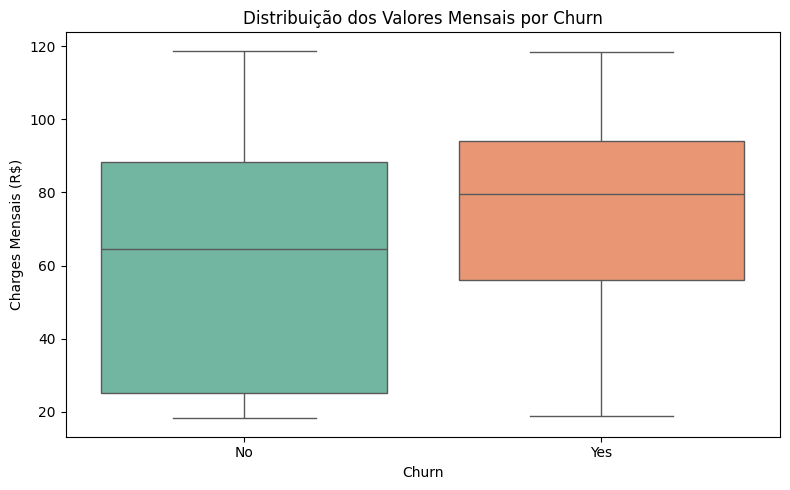

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_final, x='Churn', y='account_Charges_Monthly', palette='Set2')
plt.title('Distribuição dos Valores Mensais por Churn')
plt.ylabel('Charges Mensais (R$)')
plt.xlabel('Churn')
plt.tight_layout()
plt.show()

#Boxplot — Distribuição dos valores pagos com foco no Churn
#Mostra mediana, distribuição e outliers para clientes com e sem churn.
#Comparar faixas de valores pagos entre quem ficou e quem saiu.


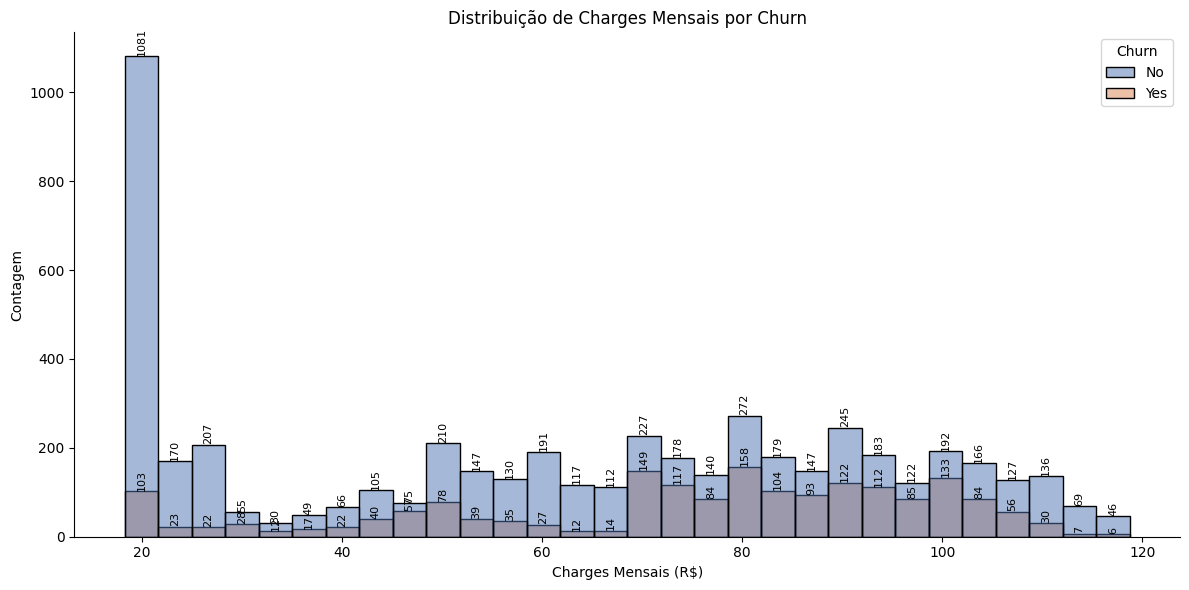

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = {'No': '#4C72B0', 'Yes': '#DD8452'}  # Azul e Laranja-Rosa

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df_final,
    x='account_Charges_Monthly',
    hue='Churn',
    bins=30,
    kde=False,
    palette=custom_palette,
    element='bars',
    stat='count'
)

plt.title('Distribuição de Charges Mensais por Churn')
plt.xlabel('Charges Mensais (R$)')
plt.ylabel('Contagem')

# Adiciona os números no topo das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 1,
            int(height),
            ha='center',
            va='bottom',
            fontsize=8,
            rotation=90
        )

plt.tight_layout()
sns.despine()
plt.show()

#1241 yes entre valores que vao aroximadamente entre 70 a 110 reais

In [29]:
percentual = (1241 / 1869) * 100
print(f"{percentual:.2f}%")
#soma aproximada entre os valores de yes churn entre 70 e 110 reais

66.40%


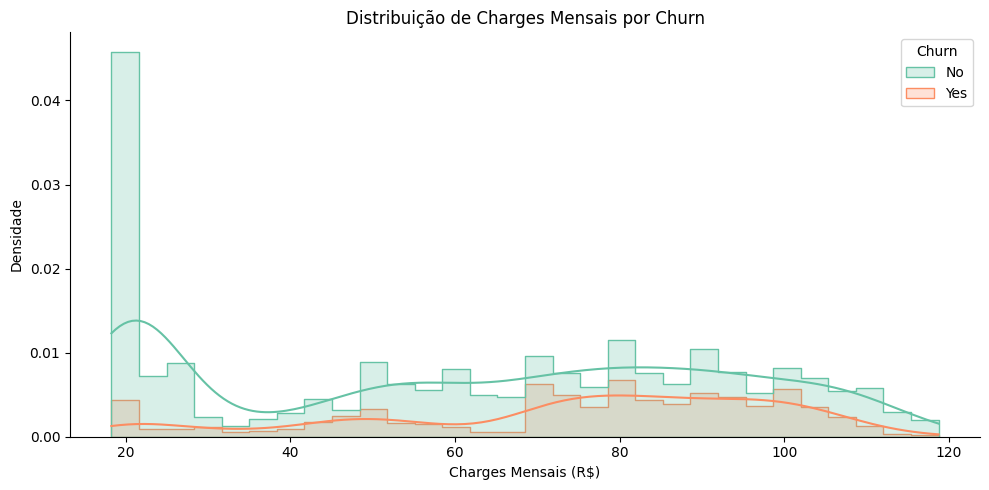

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_final, x='account_Charges_Monthly', hue='Churn', bins=30, kde=True, palette='Set2', element='step', stat='density')
plt.title('Distribuição de Charges Mensais por Churn')
plt.xlabel('Charges Mensais (R$)')
plt.ylabel('Densidade')
plt.tight_layout()
sns.despine()
plt.show()

#Histogramas sobrepostos com hue — Frequência por faixas de valor

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stacked_churn_percent(df, column):
    # tabela cruzada com percentual por linha
    cross_tab = pd.crosstab(df[column], df['Churn'], normalize='index') * 100
    cross_tab = cross_tab[['No', 'Yes']]  # Garante ordem Churn: No -> Yes

    # gráfico de barras horizontais empilhadas
    ax = cross_tab.plot(
        kind='barh',
        stacked=True,
        figsize=(8, 4),
        color=['#4C72B0', '#DD8452']
    )

    # Títulos e legendas
    plt.title(f'Percentual de Churn por: {column.replace("_", " ")}')
    plt.xlabel('Percentual (%)')
    plt.ylabel(column.replace('_', ' '))
    plt.legend(title='Churn', loc='center left', bbox_to_anchor=(1, 0.5))

    # Adiciona os números nas barras
    for i, (index, row) in enumerate(cross_tab.iterrows()):
        no_val = row['No']
        yes_val = row['Yes']
        ax.text(no_val / 2, i, f'{no_val:.1f}%', va='center', ha='center', color='white', fontsize=9)
        ax.text(no_val + yes_val / 2, i, f'{yes_val:.1f}%', va='center', ha='center', color='white', fontsize=9)

    plt.tight_layout()
    sns.despine()
    plt.show()


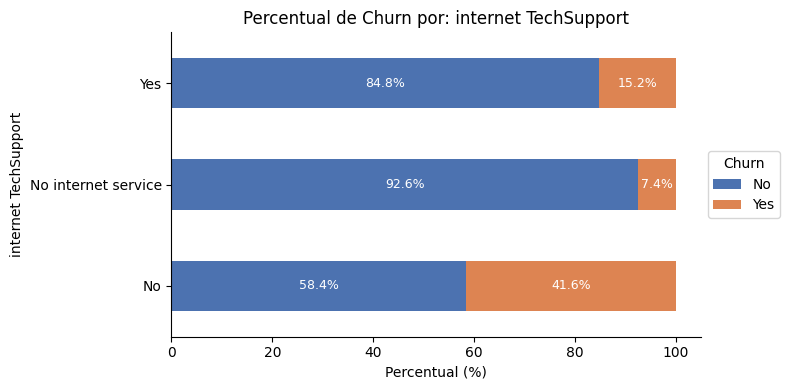

In [32]:
plot_stacked_churn_percent(df_final, 'internet_TechSupport')



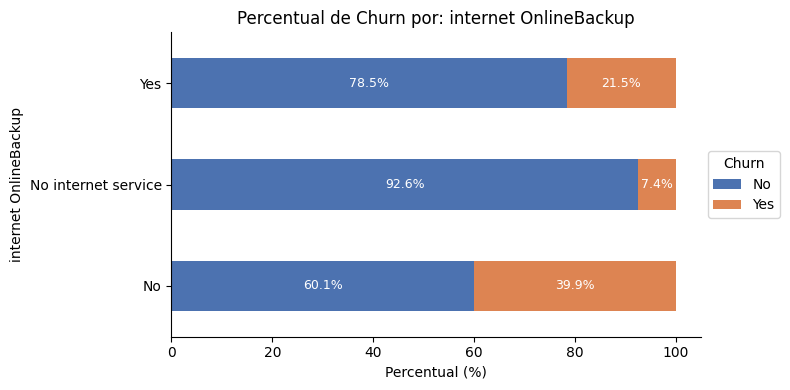

In [33]:
plot_stacked_churn_percent(df_final, 'internet_OnlineBackup')


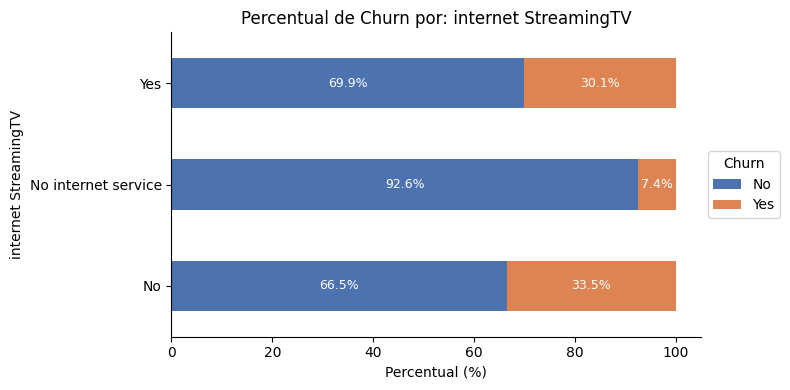

In [34]:
plot_stacked_churn_percent(df_final, 'internet_StreamingTV')


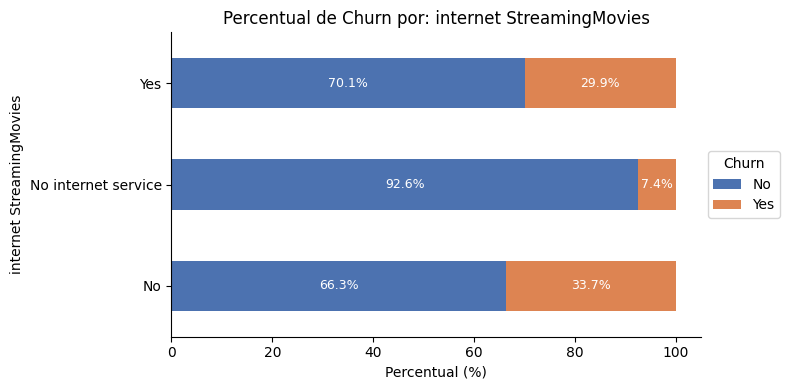

In [35]:
plot_stacked_churn_percent(df_final, 'internet_StreamingMovies')

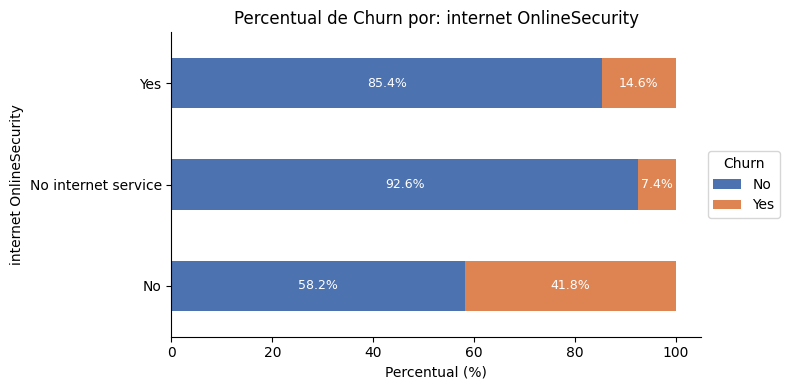

In [36]:
plot_stacked_churn_percent(df_final, 'internet_OnlineSecurity')

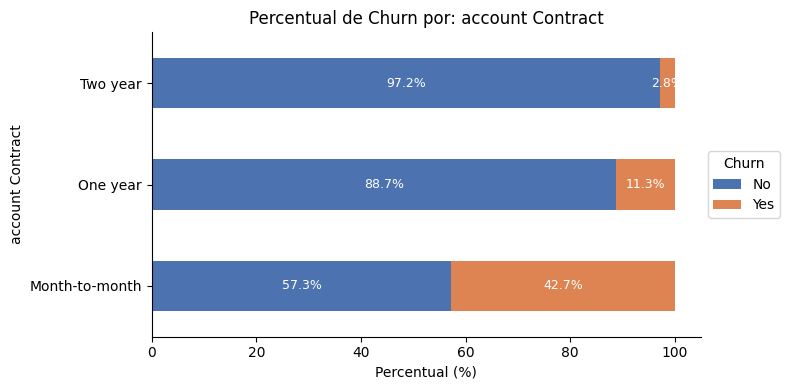

In [37]:
plot_stacked_churn_percent(df_final, 'account_Contract')

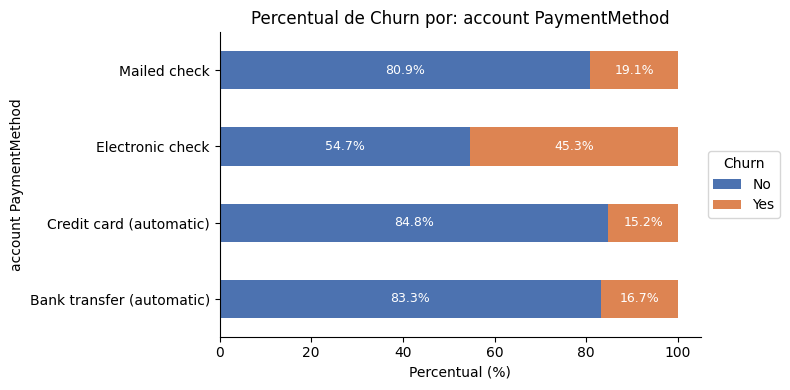

In [38]:
plot_stacked_churn_percent(df_final, 'account_PaymentMethod')

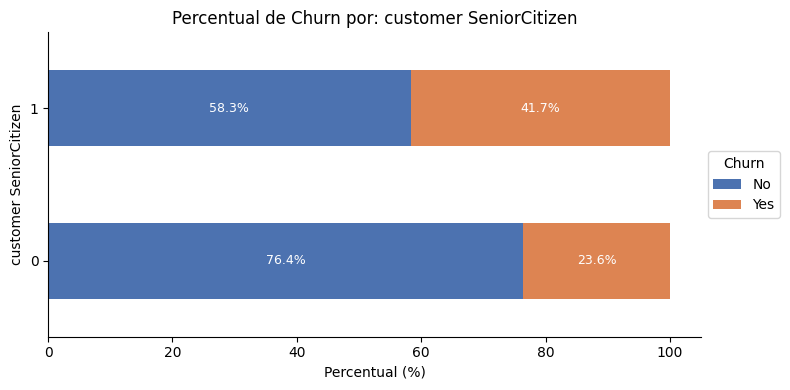

In [39]:
plot_stacked_churn_percent(df_final, 'customer_SeniorCitizen')
# 0 Não idoso / 1 Sim idoso (acima 65)

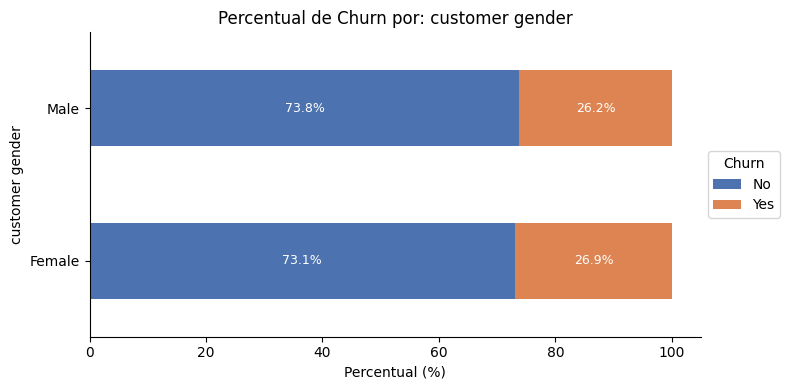

In [40]:
plot_stacked_churn_percent(df_final, 'customer_gender')

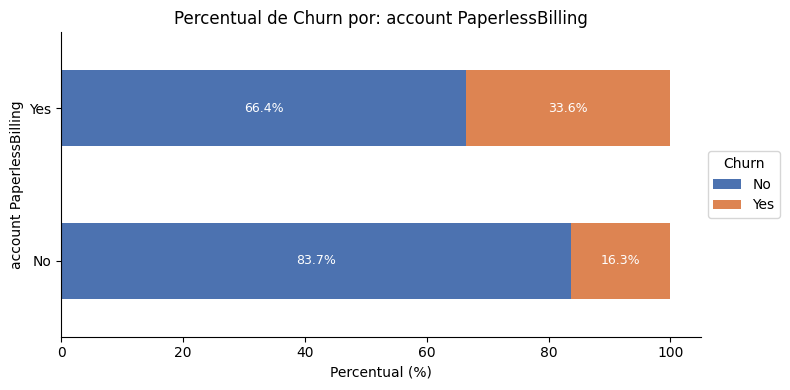

In [41]:
plot_stacked_churn_percent(df_final, 'account_PaperlessBilling')

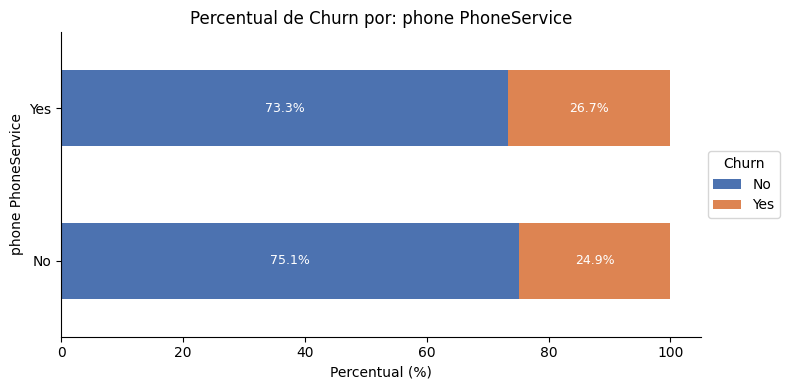

In [42]:
plot_stacked_churn_percent(df_final, 'phone_PhoneService')

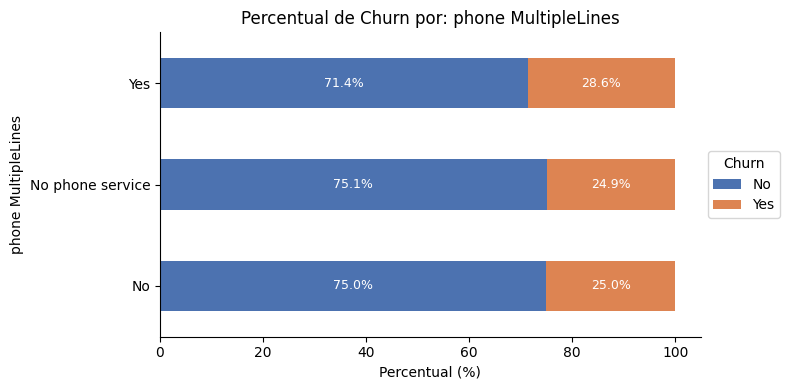

In [43]:
plot_stacked_churn_percent(df_final, 'phone_MultipleLines')

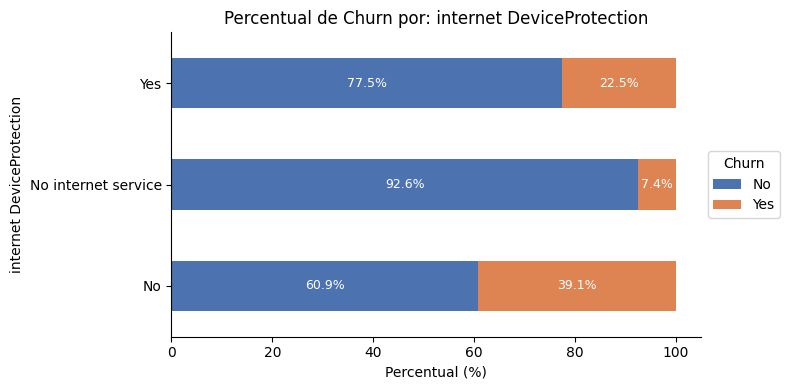

In [44]:
plot_stacked_churn_percent(df_final, 'internet_DeviceProtection')

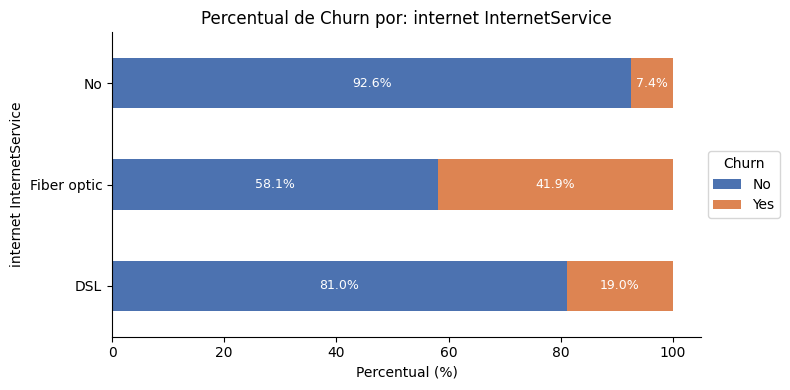

In [45]:
 plot_stacked_churn_percent(df_final, 'internet_InternetService')

Histograma sobrepposto: visualização Churn x tempo de contrato.

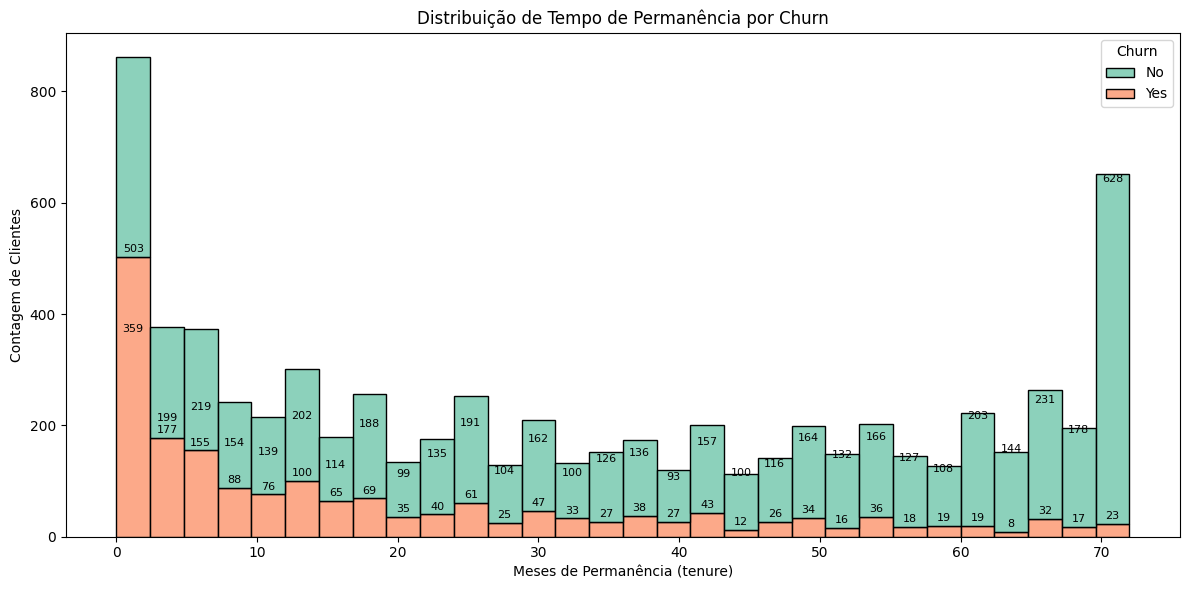

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criação da figura
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    data=df_final,
    x='customer_tenure',
    hue='Churn',
    bins=30,
    kde=False,
    palette='Set2',
    multiple='stack'
)

plt.title('Distribuição de Tempo de Permanência por Churn')
plt.xlabel('Meses de Permanência (tenure)')
plt.ylabel('Contagem de Clientes')

# Adiciona os números no topo das barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 5,
            int(height),
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()



Boxplot: compara a distribuição dos meses de contrato por churn, mostrando, mediana, dispersão e outliers

/tmp/ipython-input-47-216748368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_final, x='Churn', y='customer_tenure', palette='Set2')


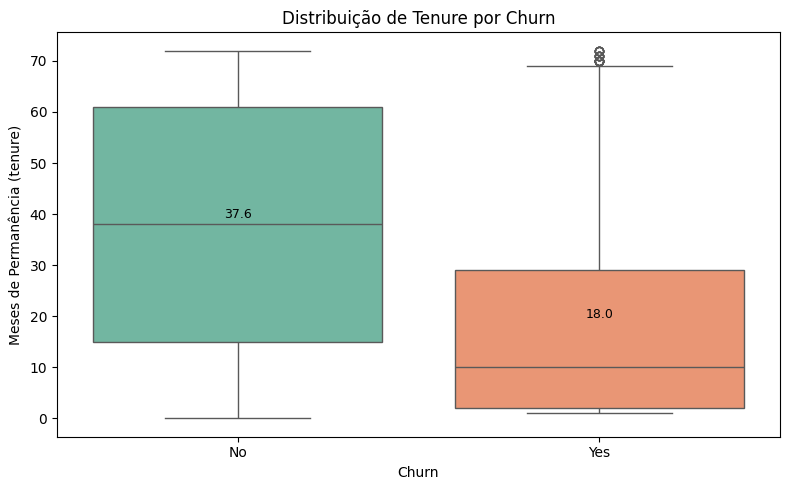

In [47]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df_final, x='Churn', y='customer_tenure', palette='Set2')

# Adiciona os valores médios no topo de cada boxplot
means = df_final.groupby('Churn')['customer_tenure'].mean()

for i, mean_val in enumerate(means):
    ax.text(i, mean_val + 1, f'{mean_val:.1f}', ha='center', va='bottom', fontsize=9, color='black')

plt.title('Distribuição de Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Meses de Permanência (tenure)')
plt.tight_layout()
plt.show()


In [48]:
df_final['contas_Diarias'] = (df_final['account_Charges_Monthly'] / 30).round(2)


In [49]:
display(df_final['contas_Diarias'].head(5))

,contas_Diarias
0,2.19
1,2.00
2,2.46
3,3.27
4,2.80


In [50]:
import pandas as pd

# Converte a coluna em numerica mesmo se houver erros
df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce')

# cliente churn "Yes" e soma total
total_charges_churn_yes = df_final[df_final['Churn'] == 'Yes']['account_Charges_Total'].sum()

# Exibe o valor formatado
print(f"Total de cobranças dos clientes que cancelaram (Churn = Yes): R$ {total_charges_churn_yes:,.2f}")

Total de cobranças dos clientes que cancelaram (Churn = Yes): R$ 2,862,926.90


In [51]:
total_charges_churn_yes = df_final[df_final['Churn'] == 'Yes']['account_Charges_Total'].sum()
#Total de cobranças dos clientes com Churn = Yes

In [52]:
total_charges_geral = df_final['account_Charges_Total'].sum()
# Total geral de cobranças (todos os clientes)

In [53]:
percentual_churn = (total_charges_churn_yes / total_charges_geral) * 100
#Percentual que o churn representa sobre o total

In [54]:
media_churn = df_final[df_final['Churn'] == 'Yes']['account_Charges_Total'].mean()
#Valor médio de cobrança por cliente churn


In [55]:
print(f"🔹 Total pago por clientes que cancelaram: R$ {total_charges_churn_yes:,.2f}")
print(f"🔹 Total geral de cobranças: R$ {total_charges_geral:,.2f}")
print(f"🔹 Percentual do churn sobre o total: {percentual_churn:.2f}%")
print(f"🔹 Valor médio por cliente que cancelou: R$ {media_churn:,.2f}")

🔹 Total pago por clientes que cancelaram: R$ 2,862,926.90
🔹 Total geral de cobranças: R$ 16,056,168.70
🔹 Percentual do churn sobre o total: 17.83%
🔹 Valor médio por cliente que cancelou: R$ 1,531.80
